# H2O Tutorial

Author: Spencer Aiello

Contact: spencer@h2oai.com

This tutorial steps through a quick introduction to H2O's Python API. The goal of this tutorial is to introduce through a complete example H2O's capabilities from Python. Also, to help those that are accustomed to Scikit Learn and Pandas, the demo will be specific call outs for differences between H2O and those packages; this is intended to help anyone that needs to do machine learning on really Big Data make the transition. It is not meant to be a tutorial on machine learning or algorithms.

Detailed documentation about H2O's and the Python API is available at http://docs.h2o.ai.

## Setting up your system for this demo

The following code creates two csv files using data from the [Boston Housing dataset](https://archive.ics.uci.edu/ml/datasets/Housing) which is built into scikit-learn and adds them to the local directory

In [55]:
import pandas as pd
import numpy
from numpy.random import choice
from sklearn.datasets import load_boston
from h2o.estimators.random_forest import H2ORandomForestEstimator


import h2o
h2o.init()

H2O cluster uptime:,18 seconds 852 milliseconds
H2O cluster version:,3.7.0.99999
H2O cluster name:,spencer
H2O cluster total nodes:,1
H2O cluster total free memory:,8.89 GB
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster healthy:,True
H2O Connection ip:,127.0.0.1
H2O Connection port:,54321
H2O Connection proxy:,None


In [56]:
# transfer the boston data from pandas to H2O
boston_data = load_boston()
X = pd.DataFrame(data=boston_data.data, columns=boston_data.feature_names)
X["Median_value"] = boston_data.target
X = h2o.H2OFrame.from_python(X.to_dict("list"))

In [57]:
# select 10% for valdation
r = X.runif(seed=123456789)
train = X[r < 0.9,:]
valid = X[r >= 0.9,:]

h2o.export_file(train, "Boston_housing_train.csv", force=True)
h2o.export_file(valid, "Boston_housing_test.csv", force=True)

Enable inline plotting in the Jupyter Notebook

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt

## Intro to H2O Data Munging

Read csv data into H2O. This loads the data into the H2O column compressed, in-memory, key-value store.

In [59]:
fr = h2o.import_file("Boston_housing_train.csv")

View the top of the H2O frame.

In [60]:
fr.head()

INDUS,B,PTRATIO,LSTAT,Median_value,TAX,RM,CRIM,CHAS,NOX,ZN,DIS,AGE,RAD
2.31,396.9,15.3,4.98,24,296,6.575,0.00632,0,0.538,18,4.09,65.2,1
7.07,392.83,17.8,4.03,34.7,242,7.185,0.02729,0,0.469,0,4.9671,61.1,2
2.18,396.9,18.7,5.33,36.2,222,7.147,0.06905,0,0.458,0,6.0622,54.2,3
2.18,394.12,18.7,5.21,28.7,222,6.43,0.02985,0,0.458,0,6.0622,58.7,3
7.87,395.6,15.2,12.43,22.9,311,6.012,0.08829,0,0.524,12.5,5.5605,66.6,5
7.87,396.9,15.2,19.15,27.1,311,6.172,0.14455,0,0.524,12.5,5.9505,96.1,5
7.87,386.63,15.2,29.93,16.5,311,5.631,0.21124,0,0.524,12.5,6.0821,100,5
7.87,386.71,15.2,17.1,18.9,311,6.004,0.17004,0,0.524,12.5,6.5921,85.9,5
7.87,392.52,15.2,20.45,15,311,6.377,0.22489,0,0.524,12.5,6.3467,94.3,5
7.87,396.9,15.2,13.27,18.9,311,6.009,0.11747,0,0.524,12.5,6.2267,82.9,5


View the bottom of the H2O Frame

In [61]:
fr.tail()

INDUS,B,PTRATIO,LSTAT,Median_value,TAX,RM,CRIM,CHAS,NOX,ZN,DIS,AGE,RAD
9.69,396.9,19.2,13.59,24.5,391,5.926,0.27957,0,0.585,0,2.3817,42.6,6
9.69,393.29,19.2,17.6,23.1,391,5.67,0.17899,0,0.585,0,2.7986,28.8,6
9.69,396.9,19.2,14.1,18.3,391,5.794,0.26838,0,0.585,0,2.8927,70.6,6
9.69,395.77,19.2,15.1,17.5,391,5.569,0.17783,0,0.585,0,2.3999,73.5,6
9.69,396.9,19.2,14.33,16.8,391,6.027,0.22438,0,0.585,0,2.4982,79.7,6
11.93,391.99,21,9.67,22.4,273,6.593,0.06263,0,0.573,0,2.4786,69.1,1
11.93,396.9,21,9.08,20.6,273,6.12,0.04527,0,0.573,0,2.2875,76.7,1
11.93,396.9,21,5.64,23.9,273,6.976,0.06076,0,0.573,0,2.1675,91,1
11.93,393.45,21,6.48,22,273,6.794,0.10959,0,0.573,0,2.3889,89.3,1
11.93,396.9,21,7.88,11.9,273,6.03,0.04741,0,0.573,0,2.505,80.8,1


Select a column

fr["VAR_NAME"]

In [62]:
fr["CRIM"].head() # Tab completes

CRIM
0.00632
0.02729
0.06905
0.02985
0.08829
0.14455
0.21124
0.17004
0.22489
0.11747


Select a few columns

In [63]:
columns = ["CRIM", "RM", "RAD"]
fr[columns].head()

CRIM,RM,RAD
0.00632,6.575,1
0.02729,7.185,2
0.06905,7.147,3
0.02985,6.43,3
0.08829,6.012,5
0.14455,6.172,5
0.21124,5.631,5
0.17004,6.004,5
0.22489,6.377,5
0.11747,6.009,5


Select a subset of rows

Unlike in Pandas, columns may be identified by index or column name. **Therefore, when subsetting by rows, you must also pass the column selection.**

In [64]:
fr[2:7,:]  # explicitly select all columns with :

INDUS,B,PTRATIO,LSTAT,Median_value,TAX,RM,CRIM,CHAS,NOX,ZN,DIS,AGE,RAD
2.18,396.9,18.7,5.33,36.2,222,7.147,0.06905,0,0.458,0,6.0622,54.2,3
2.18,394.12,18.7,5.21,28.7,222,6.43,0.02985,0,0.458,0,6.0622,58.7,3
7.87,395.6,15.2,12.43,22.9,311,6.012,0.08829,0,0.524,12.5,5.5605,66.6,5
7.87,396.9,15.2,19.15,27.1,311,6.172,0.14455,0,0.524,12.5,5.9505,96.1,5
7.87,386.63,15.2,29.93,16.5,311,5.631,0.21124,0,0.524,12.5,6.0821,100,5


Key attributes:
      * columns, names, col_names
      * len, shape, dim, nrow, ncol
      * types
      
Note: 

Since the data is _not_ in local python memory
there is no "values" attribute. If you want to 
pull all of the data into the local python memory
then do so explicitly with h2o.export_file and
reading the data into python memory from disk.

In [65]:
# The columns attribute is exactly like Pandas
print("Columns:", fr.columns, "\n")
print("Columns:", fr.names, "\n")
print("Columns:", fr.col_names, "\n")

# There are a number of attributes to get at the shape
print("length:", str( len(fr) ), "\n")
print("shape:", fr.shape, "\n")
print("dim:", fr.dim, "\n")
print("nrow:", fr.nrow, "\n")
print("ncol:", fr.ncol, "\n")

# Use the "types" attribute to list the column types
print("types:", fr.types, "\n")

Columns: ['INDUS', 'B', 'PTRATIO', 'LSTAT', 'Median_value', 'TAX', 'RM', 'CRIM', 'CHAS', 'NOX', 'ZN', 'DIS', 'AGE', 'RAD'] 

Columns: ['INDUS', 'B', 'PTRATIO', 'LSTAT', 'Median_value', 'TAX', 'RM', 'CRIM', 'CHAS', 'NOX', 'ZN', 'DIS', 'AGE', 'RAD'] 

Columns: ['INDUS', 'B', 'PTRATIO', 'LSTAT', 'Median_value', 'TAX', 'RM', 'CRIM', 'CHAS', 'NOX', 'ZN', 'DIS', 'AGE', 'RAD'] 

length: 453 

shape: (453, 14) 

dim: [453, 14] 

nrow: 453 

ncol: 14 

types: {'INDUS': 'real', 'B': 'real', 'PTRATIO': 'real', 'LSTAT': 'real', 'Median_value': 'real', 'TAX': 'int', 'CHAS': 'int', 'NOX': 'real', 'RM': 'real', 'CRIM': 'real', 'ZN': 'real', 'DIS': 'real', 'AGE': 'real', 'RAD': 'int'} 



Select rows based on value

In [66]:
fr.shape

(453, 14)

Boolean masks can be used to subselect rows based on a criteria.

In [67]:
mask = fr["CRIM"]>1
fr[mask,:].shape

(156, 14)

Get summary statistics of the data and additional data distribution information.

In [68]:
fr.describe()

Rows:453 Cols:14

Chunk compression summary: 


chunk_type,chunk_name,count,count_percentage,size,size_percentage
CBS,Bits,1,7.1428576,127 B,0.3966271
C1N,1-Byte Integers (w/o NAs),1,7.1428576,521 B,1.6271081
C2,2-Byte Integers,1,7.1428576,974 B,3.041849
C2S,2-Byte Fractions,1,7.1428576,990 B,3.0918176
CUD,Unique Reals,4,28.57143,7.1 KB,22.660837
C8D,64-bit Reals,6,42.857143,21.6 KB,69.18176



Frame distribution summary: 


,size,number_of_rows,number_of_chunks_per_column,number_of_chunks
172.16.2.38:54321,31.3 KB,453.0,1.0,14.0
mean,31.3 KB,453.0,1.0,14.0
min,31.3 KB,453.0,1.0,14.0
max,31.3 KB,453.0,1.0,14.0
stddev,0 B,0.0,0.0,0.0
total,31.3 KB,453.0,1.0,14.0


,INDUS,B,PTRATIO,LSTAT,Median_value,TAX,RM,CRIM,CHAS,NOX,ZN,DIS,AGE,RAD
type,real,real,real,real,real,int,real,real,int,real,real,real,real,int
mins,0.46,2.52,12.600000000000001,1.73,5.0,187.0,3.561,0.00632,0.0,0.385,0.0,1.1296000000000002,2.9000000000000004,1.0
mean,11.294415011037524,357.7381677704198,18.444150110375286,12.587660044150104,22.566887417218553,409.16556291390737,6.294876379690949,3.556021986754966,0.06622516556291391,0.5558865342163354,11.260485651214122,3.7655474613686546,68.44944812362036,9.551876379690949
maxs,27.740000000000002,396.9,22.0,37.97,50.0,711.0,8.78,88.9762,1.0,0.871,100.0,12.1265,100.0,24.0
sigma,6.8599671962466005,89.69017429461464,2.193835388521729,7.114792194001197,9.214100788654944,167.43698182378893,0.6976165127371203,8.571008142938867,0.24895020752244879,0.11645146780384417,23.3793628597578,2.0977205922742157,28.372540334780403,8.697984572916985
zeros,0,0,0,0,0,0,0,0,423,0,336,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,2.31,396.9,15.3,4.98,24.0,296.0,6.575,0.00632,0.0,0.538,18.0,4.09,65.2,1.0
1,7.07,392.83,17.8,4.03,34.7,242.0,7.1850000000000005,0.027290000000000002,0.0,0.46900000000000003,0.0,4.9671,61.1,2.0
2,2.18,396.9,18.7,5.33,36.2,222.0,7.147,0.06905,0.0,0.458,0.0,6.062200000000002,54.2,3.0


Set up the predictor and response column names

Using H2O algorithms, it's easier to reference predictor and response columns
by name in a single frame (i.e., don't split up X and y)

In [69]:
x = fr.names[:]
y="Median_value"
x.remove(y)

## Machine Learning With H2O

H2O is a machine learning library built in Java with interfaces in Python, R, Scala, and Javascript. It is [open source](http://github.com/h2oai) and [well-documented](http://docs.h2o.ai).

Unlike Scikit-learn, H2O allows for categorical and missing data.

The basic work flow is as follows:
* Fit the training data with a machine learning algorithm
* Predict on the testing data

### Simple model

In [70]:
# Define and fit first 400 points
model = H2ORandomForestEstimator(seed=42)
model.train(x=x, y=y, training_frame=fr[:400,:])

In [71]:
model.predict(fr[400:fr.nrow,:])        # Predict the rest

predict
15.0905
15.4835
19.8965
18.4365
18.74
13.3565
16.6105
16.6615
14.5085
15.3985


The performance of the model can be checked using the holdout dataset

In [72]:
perf = model.model_performance(fr[400:fr.nrow,:])
perf.r2()      # get the r2 on the holdout data
perf.mse()     # get the mse on the holdout data
perf           # display the performance object


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 10.11588971982768
R^2: 0.4187331012998865
Mean Residual Deviance: 10.11588971982768


### Train-Test Split

Instead of taking the first 400 observations for training, we can use H2O to create a random test train split of the data.

In [73]:
r = fr.runif(seed=12345)   # build random uniform column over [0,1]
train= fr[r<0.75,:]     # perform a 75-25 split
test = fr[r>=0.75,:]

model = H2ORandomForestEstimator(seed=42)
model.train(x=x, y=y, training_frame=train, validation_frame=test)

perf = model.model_performance(test)
perf.r2()

0.8387017797275678

There was a massive jump in the R^2 value. This is because the original data is not shuffled.

### Cross validation

H2O's machine learning algorithms take an optional parameter **nfolds** to specify the number of cross-validation folds to build. H2O's cross-validation uses an internal weight vector to build the folds in an efficient manner (instead of physically building the splits).

In conjunction with the **nfolds** parameter, a user may specify the way in which observations are assigned to each fold with the **fold_assignment** parameter, which can be set to either:
        * AUTO:  Perform random assignment
        * Random: Each row has a equal (1/nfolds) chance of being in any fold.
        * Modulo: Observations are in/out of the fold based by modding on nfolds

In [74]:
model = H2ORandomForestEstimator(nfolds=10) # build a 10-fold cross-validated model
model.train(x=x, y=y, training_frame=fr)

In [75]:
scores = numpy.array([m.r2() for m in model.xvals]) # iterate over the xval models using the xvals attribute
print("Expected R^2: %.2f +/- %.2f \n" % (scores.mean(), scores.std()*1.96))
print("Scores:", scores.round(2))

Expected R^2: 0.87 +/- 0.02 

Scores: [ 0.86  0.87  0.85  0.87  0.87  0.85  0.87  0.87  0.87  0.86]


However, you can still make use of the cross_val_score from Scikit-Learn

### Cross validation: H2O and Scikit-Learn

In [76]:
from sklearn.cross_validation import cross_val_score
from h2o.cross_validation import H2OKFold
from h2o.model.regression import h2o_r2_score
from sklearn.metrics.scorer import make_scorer

You still must use H2O to make the folds. Currently, there is no H2OStratifiedKFold. Additionally, the H2ORandomForestEstimator is similar to the scikit-learn RandomForestRegressor object with its own ``train`` method.

In [77]:
model = H2ORandomForestEstimator(seed=42)

In [78]:
scorer = make_scorer(h2o_r2_score)   # make h2o_r2_score into a scikit_learn scorer
custom_cv = H2OKFold(fr, n_folds=10, seed=42) # make a cv 
scores = cross_val_score(model, fr[x], fr[y], scoring=scorer, cv=custom_cv)

print("Expected R^2: %.2f +/- %.2f \n" % (scores.mean(), scores.std()*1.96))
print("Scores:", scores.round(2))

Expected R^2: 0.84 +/- 0.15 

Scores: [ 0.79  0.71  0.94  0.82  0.92  0.89  0.72  0.89  0.85  0.9 ]


There isn't much difference in the R^2 value since the fold strategy is exactly the same. However, there was a major difference in terms of computation time and memory usage.

Since the progress bar print out gets annoying let's disable that

In [79]:
h2o.__PROGRESS_BAR__=False
h2o.no_progress()

### Grid Search

Grid search in H2O is still under active development and it will be available very soon. However, it is possible to make use of Scikit's grid search infrastructure (with some performance penalties)

### Randomized grid search: H2O and Scikit-Learn

In [80]:
from sklearn import __version__
sklearn_version = __version__
print(sklearn_version)

0.17


If you have 0.16.1, then your system can't handle complex randomized grid searches (it works in every other version of sklearn, including the soon to be released 0.16.2 and the older versions).

The steps to perform a randomized grid search:
1. Import model and RandomizedSearchCV
2. Define model
3. Specify parameters to test
4. Define grid search object
5. Fit data to grid search object
6. Collect scores

All the steps will be repeated from above.

Because 0.16.1 is installed, we use scipy to define specific distributions

ADVANCED TIP:

Turn off reference counting for spawning jobs in parallel (n_jobs=-1, or n_jobs > 1).
We'll turn it back on again in the aftermath of a Parallel job.

If you don't want to run jobs in parallel, don't turn off the reference counting.

Pattern is:
         >>> h2o.turn_off_ref_cnts()
         >>> .... parallel job ....
         >>> h2o.turn_on_ref_cnts()

In [81]:
%%time
from sklearn.grid_search import RandomizedSearchCV  # Import grid search
from scipy.stats import randint, uniform

model = H2ORandomForestEstimator(seed=42)        # Define model

params = {"ntrees": randint(20,30),
          "max_depth": randint(1,10),
          "min_rows": randint(1,10),    # scikit's  min_samples_leaf
          "mtries": randint(2,fr[x].shape[1]),} # Specify parameters to test

scorer = make_scorer(h2o_r2_score)   # make h2o_r2_score into a scikit_learn scorer
custom_cv = H2OKFold(fr, n_folds=5, seed=42) # make a cv 
random_search = RandomizedSearchCV(model, params, 
                                   n_iter=15, 
                                   scoring=scorer, 
                                   cv=custom_cv, 
                                   random_state=42,
                                   n_jobs=1)       # Define grid search object

random_search.fit(fr[x], fr[y])

print("Best R^2:", random_search.best_score_, "\n")
print("Best params:", random_search.best_params_)

Best R^2: 0.8081677862759185 

Best params: {'ntrees': 26, 'mtries': 5, 'max_depth': 9, 'min_rows': 2}
CPU times: user 14.1 s, sys: 831 ms, total: 14.9 s
Wall time: 29.1 s


We might be tempted to think that we just had a large improvement; however we must be cautious. The function below creates a more detailed report.

In [82]:
def report_grid_score_detail(random_search, charts=True):
    """Input fit grid search estimator. Returns df of scores with details"""
    df_list = []

    for line in random_search.grid_scores_:
        results_dict = dict(line.parameters)
        results_dict["score"] = line.mean_validation_score
        results_dict["std"] = line.cv_validation_scores.std()*1.96
        df_list.append(results_dict)

    result_df = pd.DataFrame(df_list)
    result_df = result_df.sort("score", ascending=False)
    
    if charts:
        for col in get_numeric(result_df):
            if col not in ["score", "std"]:
                plt.scatter(result_df[col], result_df.score)
                plt.title(col)
                plt.show()

        for col in list(result_df.columns[result_df.dtypes == "object"]):
            cat_plot = result_df.score.groupby(result_df[col]).mean()[0]
            cat_plot.sort()
            cat_plot.plot(kind="barh", xlim=(.5, None), figsize=(7, cat_plot.shape[0]/2))
            plt.show()
    return result_df

def get_numeric(X):
    """Return list of numeric dtypes variables"""
    return X.dtypes[X.dtypes.apply(lambda x: str(x).startswith(("float", "int", "bool")))].index.tolist()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


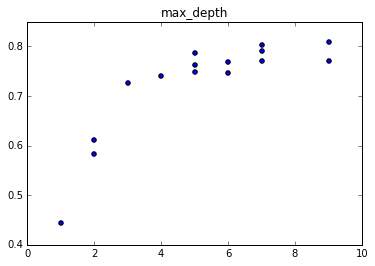

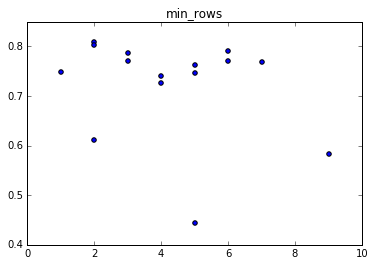

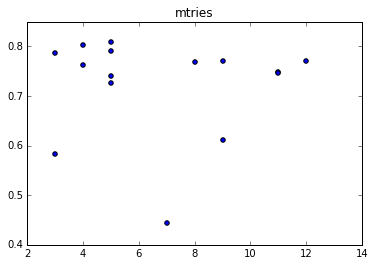

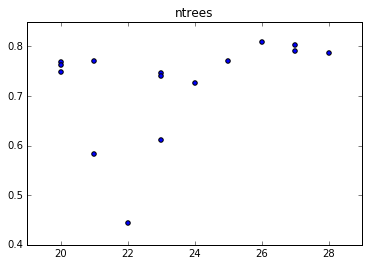

,max_depth,min_rows,mtries,ntrees,score,std
4,9,2,5,26,0.808168,0.144019
3,7,2,4,27,0.803389,0.140544
8,7,6,5,27,0.791533,0.101373
12,5,3,3,28,0.787224,0.102724
1,7,3,12,25,0.771550,0.226666


In [83]:
report_grid_score_detail(random_search).head()

Based on the grid search report, we can narrow the parameters to search and rerun the analysis. The parameters below were chosen after a few runs:

Best R^2: 0.8266285505033752 

Best params: {'mtries': 6, 'max_depth': 8, 'ntrees': 33}


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


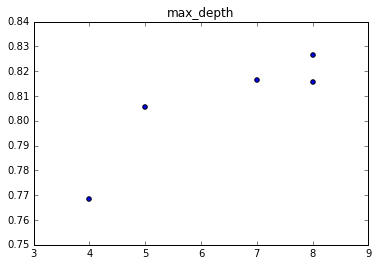

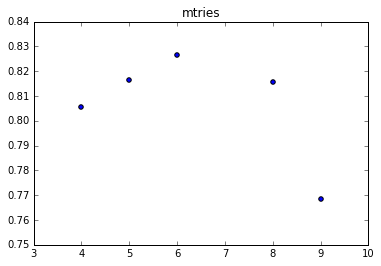

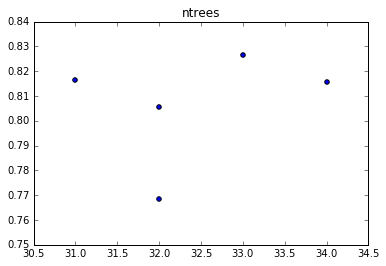

CPU times: user 5.38 s, sys: 265 ms, total: 5.64 s
Wall time: 20.1 s


In [84]:
%%time

params = {"ntrees": randint(30,35),
          "max_depth": randint(4,10),
          "mtries": randint(4,10),}

custom_cv = H2OKFold(fr, n_folds=5, seed=42)           # In small datasets, the fold size can have a big
                                                       # impact on the std of the resulting scores. More
random_search = RandomizedSearchCV(model, params,      # folds --> Less examples per fold --> higher 
                                   n_iter=5,           # variation per sample
                                   scoring=scorer, 
                                   cv=custom_cv, 
                                   random_state=43, 
                                   n_jobs=1)       

random_search.fit(fr[x], fr[y])

print("Best R^2:", random_search.best_score_, "\n")
print("Best params:", random_search.best_params_)

report_grid_score_detail(random_search)

### Transformations

Rule of machine learning: Don't use your testing data to inform your training data. Unfortunately, this happens all the time when preparing a dataset for the final model. But on smaller datasets, you must be especially careful.

At the moment, there are no classes for managing data transformations. On the one hand, this requires the user to tote around some extra state, but on the other, it allows the user to be more explicit about transforming H2OFrames.

Basic steps:

0. Remove the response variable from transformations.
1. Import transformer
2. Define transformer
3. Fit train data to transformer
4. Transform test and train data
5. Re-attach the response variable.

First let's normalize the data using the means and standard deviations of the training data.
Then let's perform a principal component analysis on the training data and select the top 5 components.
Using these components, let's use them to reduce the train and test design matrices.

In [85]:
from h2o.transforms.preprocessing import H2OScaler
from h2o.transforms.decomposition import H2OPCA

#### Normalize Data: Use the means and standard deviations from the training data.

In [86]:
y_train = train.pop("Median_value")
y_test  = test.pop("Median_value")

In [87]:
norm = H2OScaler()
norm.fit(train)
X_train_norm = norm.transform(train)
X_test_norm  = norm.transform(test)

In [88]:
print(X_test_norm.shape)
X_test_norm

(113, 13)


INDUS,B,PTRATIO,LSTAT,TAX,RM,CRIM,CHAS,NOX,ZN,DIS,AGE,RAD
-64.355,3865.91,0.527899,-55.8555,-33080.3,0.0800423,-37.8233,-0.0192197,-0.0115655,-278.582,4.80805,-276.846,-61.7635
-25.0839,3158.91,-7.05905,31.2673,-17925.7,-0.219821,-36.4874,-0.0192197,-0.00384502,18.712,5.89777,505.585,-44.0796
-25.0839,4131.16,-7.05905,3.20337,-17925.7,-0.216302,-36.9883,-0.0192197,-0.00384502,18.712,5.14634,419.287,-44.0796
-23.2204,3162.73,5.51361,13.4617,-18606.8,-0.229676,-30.6347,-0.0192197,-0.00220735,-278.582,1.09756,384.768,-52.9216
-23.2204,-6164.72,5.51361,-8.37393,-18606.8,-0.605561,-30.4583,-0.0192197,-0.00220735,-278.582,0.148708,-912.57,-52.9216
-23.2204,2191.44,5.51361,59.9907,-18606.8,-0.525316,-26.1788,-0.0192197,-0.00220735,-278.582,0.151587,856.527,-52.9216
-23.2204,3885.95,5.51361,25.4054,-18606.8,-0.276134,-30.9581,-0.0192197,-0.00220735,-278.582,1.38896,741.464,-52.9216
-38.2663,4131.16,1.61175,-23.102,-23374.5,-0.269799,-37.4962,-0.0192197,-0.00676943,-278.582,-0.748324,-3.57035,-44.0796
-31.7096,3034.88,-1.20626,-58.5666,-31207.3,0.31937,-36.8933,-0.0192197,-0.0127352,-278.582,4.10618,-1881.98,-61.7635
-31.7096,4131.16,-1.20626,131.726,-31207.3,-0.645684,-35.6885,-0.0192197,-0.0127352,-278.582,4.4128,775.983,-61.7635


Then, we can apply PCA and keep the top 5 components. A user warning is expected here.

In [89]:
pca = H2OPCA(k=5)
pca.fit(X_train_norm)
X_train_norm_pca = pca.transform(X_train_norm)
X_test_norm_pca  = pca.transform(X_test_norm)

/Users/spencer/0xdata/h2o-3/h2o-py/h2o/transforms/decomposition.py:61: UserWarning: 

	`fit` is not recommended outside of the sklearn framework. Use `train` instead.
  return super(H2OPCA, self).fit(X)


In [90]:
# prop of variance explained by top 5 components?

In [91]:
print(X_test_norm_pca.shape)
X_test_norm_pca[:5]

(113, 5)


PC1,PC2,PC3,PC4,PC5
-33279.4,-1270.67,428.963,-313.194,-17.2594
-18188.6,362.341,717.389,308.422,5.35243
-18339.5,1323.12,646.552,263.914,7.9781
-18862,260.924,774.202,-7.65515,0.209827
-17446.3,-8953.93,-383.934,-659.673,-1.52018
-18705.6,-699.361,1177.52,232.421,-4.63494
-18968,975.121,1084.82,172.809,2.05493
-23727.1,484.614,516.501,-195.329,-3.31209
-31324.7,-1801.79,-985.336,-1130.84,-31.0892
-31454,-721.681,1313.37,217.119,-31.3204


In [92]:
model = H2ORandomForestEstimator(seed=42)
model.train(x=X_train_norm_pca.names, y=y_train.names, training_frame=X_train_norm_pca.cbind(y_train))
y_hat  = model.predict(X_test_norm_pca)

In [93]:
h2o_r2_score(y_test,y_hat)

0.41816327456603075

Although this is MUCH simpler than keeping track of all of these transformations manually, it gets to be somewhat of a burden when you want to chain together multiple transformers.

### Pipelines

"Tranformers unite!"

If your raw data is a mess and you have to perform several transformations before using it, use a pipeline to keep things simple.

Steps:

1. Import Pipeline, transformers, and model
2. Define pipeline. The first and only argument is a *list* of *tuples* where the first element of each tuple is a name you give the step and the second element is a defined transformer. The last step is optionally an estimator class (like a RandomForest).
3. Fit the training data to pipeline
4. Either transform or predict the testing data

In [94]:
from h2o.transforms.preprocessing import H2OScaler
from h2o.transforms.decomposition import H2OPCA

In [95]:
from sklearn.pipeline import Pipeline                # Import Pipeline <other imports not shown>
model = H2ORandomForestEstimator(seed=42)
pipe = Pipeline([("standardize", H2OScaler()),       # Define pipeline as a series of steps
                 ("pca", H2OPCA(k=5)),
                 ("rf", model)])                     # Notice the last step is an estimator

pipe.fit(train, y_train)                             # Fit training data
y_hat = pipe.predict(test)                           # Predict testing data (due to last step being an estimator)
h2o_r2_score(y_test, y_hat)                          # Notice the final score is identical to before

0.40873475299294815

This is so much easier!!!

But, wait a second, we did worse after applying these transformations! We might wonder how different hyperparameters for the transformations impact the final score.

### Combining randomized grid search and pipelines
"Yo dawg, I heard you like models, so I put models in your models to model models."

Steps:

1. Import Pipeline, grid search, transformers, and estimators <Not shown below>
2. Define pipeline
3. Define parameters to test in the form: "(Step name)__(argument name)" A double underscore separates the two words.
4. Define grid search
5. Fit to grid search

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


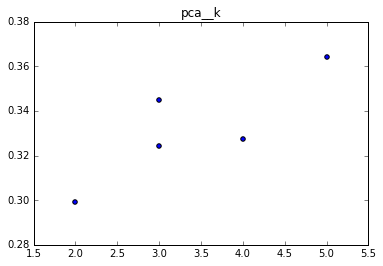

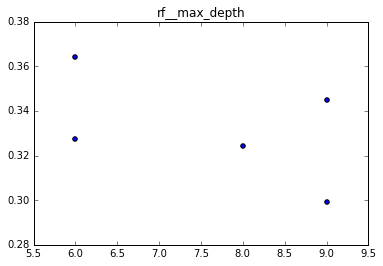

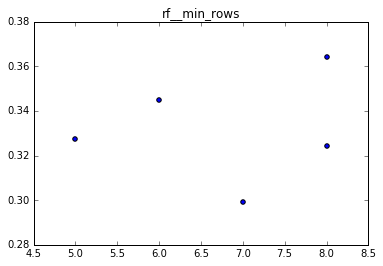

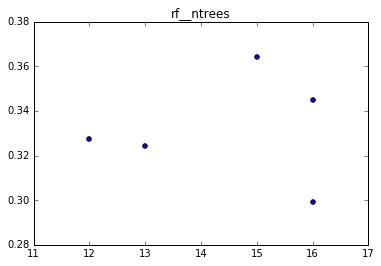

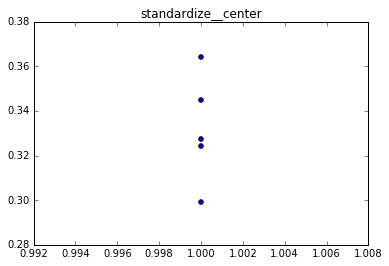

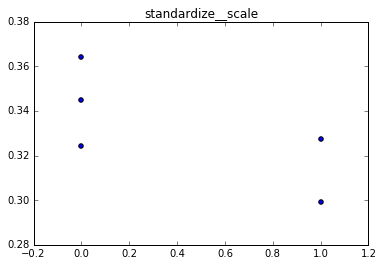

,pca__k,rf__max_depth,rf__min_rows,rf__ntrees,score,standardize__center,standardize__scale,std
0,5,6,8,15,0.364084,True,False,0.160922
4,3,9,6,16,0.344982,True,False,0.179268
1,4,6,5,12,0.327301,True,True,0.187664
2,3,8,8,13,0.324208,True,False,0.157641
3,2,9,7,16,0.298956,True,True,0.216446


In [96]:
pipe = Pipeline([("standardize", H2OScaler()),
                 ("pca", H2OPCA()),
                 ("rf", H2ORandomForestEstimator(seed=42))])

params = {"standardize__center":    [True, False],           # Parameters to test
          "standardize__scale":     [True, False],
          "pca__k":                 randint(2, 6),
          "rf__ntrees":             randint(10,20),
          "rf__max_depth":          randint(4,10),
          "rf__min_rows":           randint(5,10), }
#           "rf__mtries":             randint(1,4),}           # gridding over mtries is 
                                                               # problematic with pca grid over 
                                                               # k above 

from sklearn.grid_search import RandomizedSearchCV
from h2o.cross_validation import H2OKFold
from h2o.model.regression import h2o_r2_score
from sklearn.metrics.scorer import make_scorer

custom_cv = H2OKFold(fr, n_folds=5, seed=42)
random_search = RandomizedSearchCV(pipe, params,
                                   n_iter=5,
                                   scoring=make_scorer(h2o_r2_score),
                                   cv=custom_cv,
                                   random_state=42,
                                   n_jobs=1)


random_search.fit(fr[x],fr[y])
results = report_grid_score_detail(random_search)
results.head()

Currently Under Development (drop-in scikit-learn pieces):
    * Richer set of transforms (only PCA and Scale are implemented)
    * Richer set of estimators (only RandomForest is available)
    * Full H2O Grid Search

### Other Tips: Model Save/Load

It is useful to save constructed models to disk and reload them between H2O sessions. Here's how:

In [97]:
best_estimator = random_search.best_estimator_                        # fetch the pipeline from the grid search
h2o_model      = h2o.get_model(best_estimator._final_estimator._id)    # fetch the model from the pipeline

In [98]:
save_path = h2o.save_model(h2o_model, path=".", force=True)
print(save_path)

/Users/spencer/0xdata/h2o-3/DRF_model_python_1455147710023_171


In [99]:
# assumes new session
my_model = h2o.load_model(path=save_path)

In [100]:
my_model.predict(X_test_norm_pca)

predict
19.9129
29.0147
29.0147
21.1606
28.2647
25.1482
28.7439
20.1707
24.198
24.6652
